Saving archive (3).zip to archive (3) (1).zip
First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


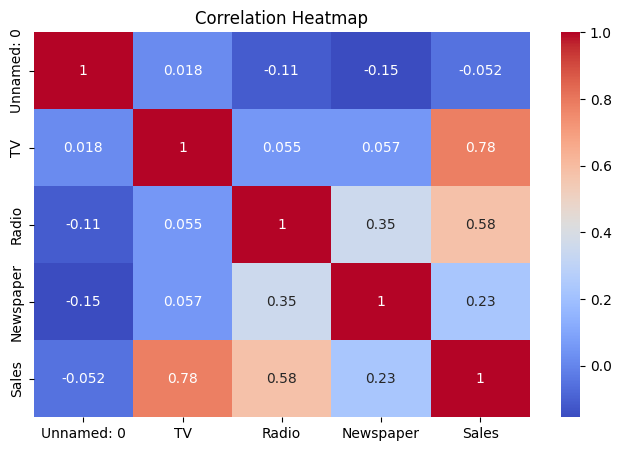


Model Performance:
R² Score: 0.90
RMSE: 1.78

Sample Predictions:
     Actual  Predicted
95     16.9  16.408024
15     22.4  20.889882
30     21.4  21.553843
158     7.3  10.608503
128    24.7  22.112373


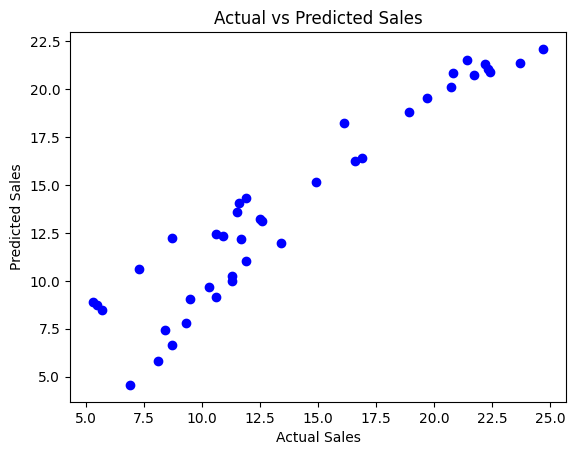

In [2]:
import pandas as pd
from google.colab import files
import zipfile
import io
import matplotlib.pyplot as plt

uploaded=files.upload()

for filename in uploaded.keys():
  if filename.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
      zip_ref.extractall('.')
      for file_info in zip_ref.infolist():
        if file_info.filename.endswith('.csv'):
          df = pd.read_csv(file_info.filename)
          break
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Advertising.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(comparison.head())


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
